<a href="https://colab.research.google.com/github/Ramaraochowdharyyallanki/gitimpact/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [4]:
import tensorflow as tf
from tensorflow import keras
# Instead of from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
!pip install matplotlib-venn

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Rice-Leaf-Disease-Images',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Rice-Leaf-Disease-Images',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='validation')


Found 2136 images belonging to 4 classes.
Found 533 images belonging to 4 classes.


In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(train_generator, epochs=50, validation_data=validation_generator)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


67/67 ━━━━━━━━━━━━━━━━━━━━ 543s 7s/step - accuracy: 0.5455 - loss: 1.0406 - val_accuracy: 0.7486 - val_loss: 0.8565
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.7515 - loss: 0.6032 - val_accuracy: 0.7805 - val_loss: 0.5719
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8258 - loss: 0.4406 - val_accuracy: 0.7955 - val_loss: 0.4437
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8401 - loss: 0.3815 - val_accuracy: 0.8893 - val_loss: 0.3698
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8834 - loss: 0.2552 - val_accuracy: 0.8874 - val_loss: 0.4319
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8942 - loss: 0.2597 - val_accuracy: 0.9043 - val_loss: 0.2832
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9237 - loss: 0.1933 - val_accuracy: 0.8818 - val_loss: 0.3848
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9264 - loss: 0.1959 - val_accuracy: 0.9456 - val_loss: 0.

In [8]:
score = model.evaluate(validation_generator)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])


17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 641ms/step - accuracy: 0.9666 - loss: 0.8055
Validation loss: 0.6608906388282776
Validation accuracy: 0.9718574285507202


In [9]:
import matplotlib.pyplot as plt

In [11]:
model.save('/content/drive/MyDrive/trained2.keras')




1.   performance of the model during training
2.   plot loss and accuracy



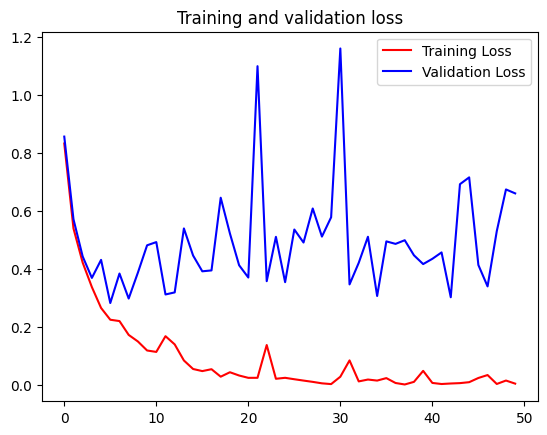

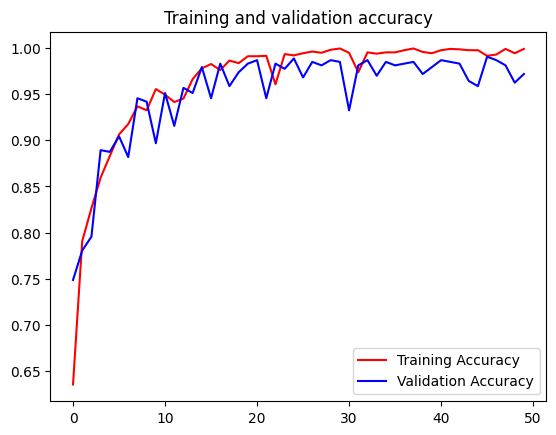

<Figure size 640x480 with 0 Axes>

In [12]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(train_loss))

plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()

Confusion matrix

17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 774ms/step


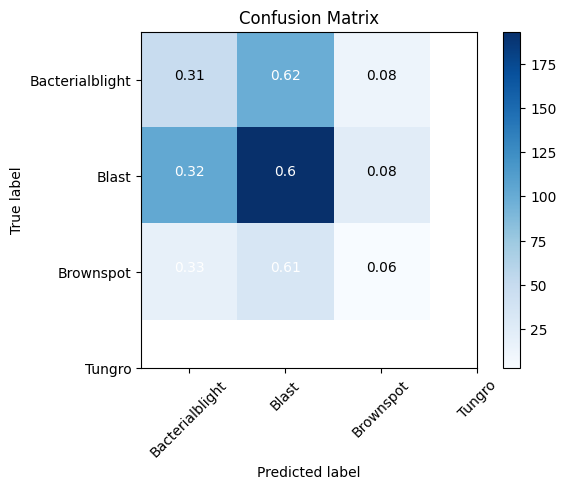

In [13]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Generate predictions for the validation data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels for the validation data
y_true = validation_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(validation_generator.class_indices))
plt.xticks(tick_marks, validation_generator.class_indices, rotation=45)
plt.yticks(tick_marks, validation_generator.class_indices)

# Normalize the confusion matrix
cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)

# Add labels to the confusion matrix
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Classification Report

In [14]:
from sklearn.metrics import classification_report

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report:\n', classification_report(validation_generator.classes, y_pred))

17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 596ms/step
Classification Report:
               precision    recall  f1-score   support

           1       0.26      0.28      0.27       159
           2       0.59      0.60      0.60       320
           3       0.08      0.06      0.06        54

    accuracy                           0.45       533
   macro avg       0.31      0.31      0.31       533
weighted avg       0.44      0.45      0.45       533



Roc curve

17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 669ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


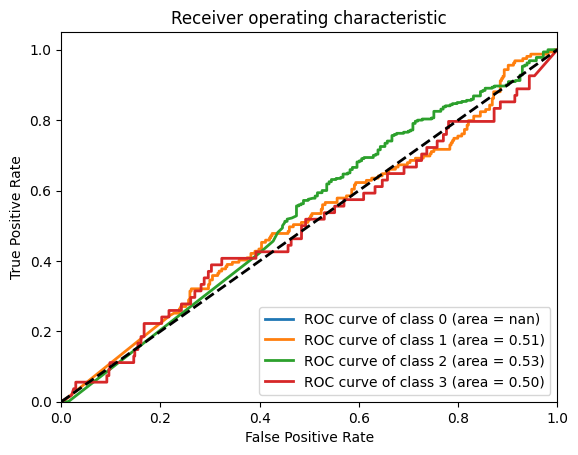

In [16]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate predictions for the validation data
Y_pred = model.predict(validation_generator)

# Get the true labels for the validation data
y_true = validation_generator.classes

# Convert class indices to one-hot encoded labels
y_true = to_categorical(y_true, num_classes=len(validation_generator.class_indices))

# Get the number of classes
num_classes = y_true.shape[1]

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('/content/drive/MyDrive/trained2.keras')

# Load and preprocess the input image
img_path = '/content/drive/MyDrive/Rice-Leaf-Disease-Images/Tungro/TUNGRO1_034.jpg'
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.

# Make a prediction on the input image
preds = model.predict(x)

# Manually specify the class labels
class_labels = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']

# Get the predicted class label
pred_label = class_labels[np.argmax(preds)]

# Print the predicted class label or "Not Recognized" if unknown
if pred_label == 'unknown':
    print('Leaf disease not recognized. Please try another image.')
else:
    print('The leaf disease is:', pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
The leaf disease is: Tungro


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


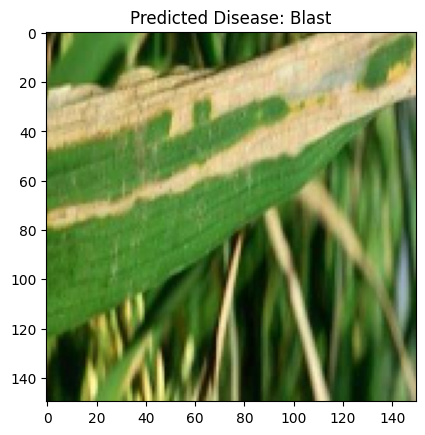

Precautions: Rotate crops
Remove diseased plants
Avoid overhead watering
  
Solutions: Spray fungicides
Use resistant varieties of rice
Ensure good drainage and proper irrigation


In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('/content/drive/MyDrive/trained2.keras')

# Load and preprocess the input image
img_path = '/content/drive/MyDrive/Rice-Leaf-Disease-Images/Bacterialblight/BACTERAILBLIGHT3_110.JPG'
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.

# Make a prediction on the input image
preds = model.predict(x)

# Manually specify the class labels and corresponding solutions/precautions
class_details = {
    'Bacterialblight': {
        'precautions': ['Practice good field sanitation', 'Use pathogen-free seeds', 'Apply appropriate fertilizers and pesticides'],
        'solutions': ['Spray copper-based bactericides', 'Ensure good drainage and proper irrigation', 'Apply fungicides']
    },
    'Blast': {
        'precautions': ['Rotate crops', 'Remove diseased plants', 'Avoid overhead watering'],
        'solutions': ['Spray fungicides', 'Use resistant varieties of rice', 'Ensure good drainage and proper irrigation']
    },
    'Brownspot': {
        'precautions': ['Practice crop rotation', 'Ensure good drainage and proper irrigation', 'Remove host plants from vicinity'],
        'solutions': ['Apply fungicides', 'Practice seed treatment with hot water or chemicals']
    },
    'Tungro': {
        'precautions': ['Practice good field sanitation', 'Remove infected plants', 'Plant resistant varieties of rice'],
        'solutions': ['Apply fungicides', 'Use resistant varieties of rice', 'Ensure good drainage and proper irrigation']
    }
}

# Get the predicted class label and its corresponding solutions/precautions
class_labels = list(class_details.keys())
pred_label = class_labels[np.argmax(preds)]
pred_precautions = class_details[pred_label]['precautions']
pred_solutions = class_details[pred_label]['solutions']

# Display the input image and its predicted class label, precautions, and solutions
if pred_label == 'unknown':
    print('Leaf disease not recognized. Please try another image.')
else:
    plt.imshow(img)
    plt.title('Predicted Disease: ' + pred_label)
    plt.show()
    print('Precautions:', '\n'.join(pred_precautions))
    print('  ')
    print('Solutions:', '\n'.join(pred_solutions))
